# Генерация данных

In [4]:
import pandas as pd 
import numpy as np 
from datetime import datetime

In [22]:
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2025-06-20", freq="D")
cars_ids = [f"Car_{i}" for i in range(1, num_cars + 1)]
fuel_price_per_liter = np.random.normal(55, 5, num_months)  # Цена топлива 


random_dates = np.random.choice(dates, size=2000, replace=True)
random_dates = pd.to_datetime(random_dates)
dates = random_dates
dates

DatetimeIndex(['2025-04-11', '2024-05-19', '2023-05-11', '2024-04-29',
               '2025-03-29', '2024-10-08', '2023-01-21', '2025-04-20',
               '2023-06-16', '2023-10-01',
               ...
               '2023-12-29', '2024-03-12', '2024-10-31', '2024-07-04',
               '2023-03-23', '2023-12-22', '2023-09-15', '2024-12-18',
               '2024-08-11', '2024-06-07'],
              dtype='datetime64[ns]', length=2000, freq=None)

In [34]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Настройки ---
start_date = "2023-01-01"
end_date = "2025-06-20"
num_rows = 2000
num_vehicles = 10

# --- Генерация случайных дат ---
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
random_dates = np.random.choice(date_range, size=num_rows, replace=True)
random_dates = pd.to_datetime(random_dates).sort_values()

# --- Базовые параметры ---
np.random.seed(42)
vehicle_ids = [f"Car_{i}" for i in range(1, num_vehicles + 1)]
fuel_prices = np.random.normal(55, 5, len(date_range))  # Цены для каждого дня

# --- Генерация данных ---
data = []
for i, date in enumerate(random_dates):
    vehicle = np.random.choice(vehicle_ids)
    days_since_start = (date - pd.to_datetime(start_date)).days
    
    # Пробег (200±50 км/день с ростом)
    mileage = np.random.normal(200 + 0.15*days_since_start, 50)
    
    # Топливо (12 л/100 км)
    fuel_cost = (mileage/100*12) * fuel_prices[(date - pd.to_datetime(start_date)).days]
    
    # Ремонт (зависит от пробега и сезона)
    base_repair = mileage * 0.15  # Базовый коэффициент
    if date.month in [12, 1, 2]:  # Зимой дороже
        base_repair *= 1.5
    repair_cost = np.random.exponential(base_repair) if np.random.rand() < 0.15 else 0
    
    # Аренда (с инфляцией 7% годовых)
    lease_cost = np.random.normal(3000, 500) * (1.07)**((date.year - 2023) + (date.month-1)/12)
    
    # Штрафы (5-15 тыс. руб, 8% вероятность)
    fine = np.random.uniform(5000, 15000) if np.random.rand() < 0.08 else 0
    
    data.append([
        date.strftime('%Y-%m-%d'),
        vehicle,
        round(mileage),
        round(fuel_cost),
        round(np.random.normal(2500, 400)),  # Зарплата
        round(repair_cost),
        round(lease_cost),
        round(1500000 / (5*365)),  # Амортизация
        round(1500000 * 0.015 / 365),  # Налоги и страховка
        round(np.random.normal(800, 200)),  # Админрасходы
        round(fine) if fine > 0 else 0
    ])

# --- Создание DataFrame ---
columns = [
    "Дата", "Автомобиль", "Пробег_км", "Топливо_руб", "Зарплата_руб",
    "Ремонт_руб", "Аренда_руб", "Амортизация_руб", "Налоги_руб", 
    "Админ_расходы_руб", "Штрафы_руб"
]
df = pd.DataFrame(data, columns=columns)

# --- Сохранение ---
df.to_csv("fleet_data_realistic.csv", index=False)
print(f"Сохранено {len(df)} записей. Средние расходы:")
print(df[['Ремонт_руб', 'Аренда_руб']].mean().round())

Сохранено 2000 записей. Средние расходы:
Ремонт_руб       8.0
Аренда_руб    3242.0
dtype: float64


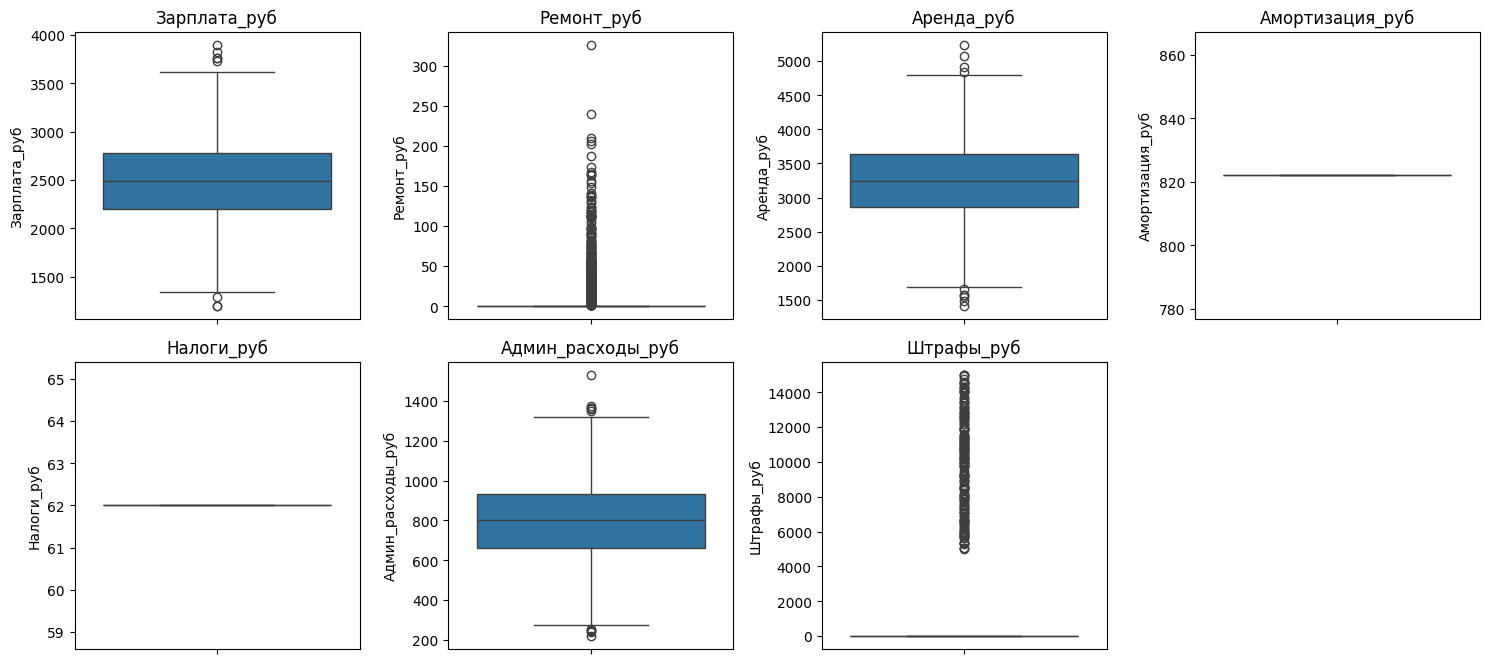

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графики распределения для ключевых показателей
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns[2:], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

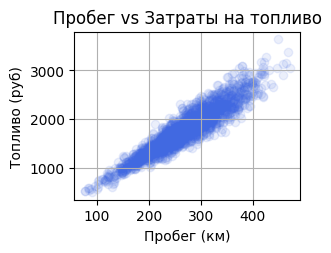

In [48]:
# 1. Пробег vs Топливо
plt.subplot(2, 2, 1)
plt.scatter(df['Пробег_км'], df['Топливо_руб'], alpha=0.1, color='royalblue')
plt.title('Пробег vs Затраты на топливо')
plt.xlabel('Пробег (км)')
plt.ylabel('Топливо (руб)')
plt.grid(True)

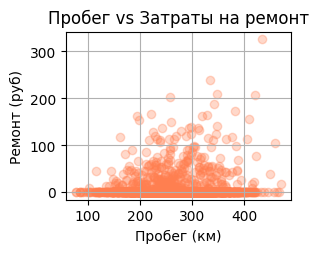

In [41]:
plt.subplot(2, 2, 2)
plt.scatter(df['Пробег_км'], df['Ремонт_руб'], alpha=0.3, color='coral')
plt.title('Пробег vs Затраты на ремонт')
plt.xlabel('Пробег (км)')
plt.ylabel('Ремонт (руб)')
plt.grid(True)


(array([19358., 19448., 19539., 19631., 19723., 19814., 19905., 19997.,
        20089., 20179., 20270.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10'),
  Text(20089.0, 0, '2025-01'),
  Text(20179.0, 0, '2025-04'),
  Text(20270.0, 0, '2025-07')])

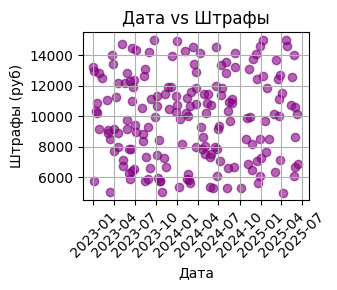

In [50]:
plt.subplot(2, 2, 4)
fine_dates = dates[df['Штрафы_руб'] > 0]
plt.scatter(fine_dates, df[df['Штрафы_руб'] > 0]['Штрафы_руб'], alpha=0.6, color='purple')
plt.title('Дата vs Штрафы')
plt.xlabel('Дата')
plt.ylabel('Штрафы (руб)')
plt.grid(True)
plt.xticks(rotation=45)